# Multilayer Neural network training using MLPClassifier from Scikitlearn

`Pre-requisite`:
    Please go through the theory materials on Neural Network before going though this tutorial.

### Dataset

Diabetes dataset for 768 women

original source is https://www.kaggle.com/datasets/saurabh00007/diabetescsv?select=diabetes.csv

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


`Outcome` column is the class label (0: not diabetic & 1: diabetic). 

Note that there is class imbalance.

In [3]:
print("Class distributions")
df['Outcome'].value_counts()

Class distributions


0    500
1    268
Name: Outcome, dtype: int64

Separate the features and class columns

In [4]:
df_features = df.loc[:,'Pregnancies':'Age'].copy(deep=True) # features. 
df_class = df['Outcome'].copy(deep=True) # class labels
display(df_features,df_class)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Split Train and test sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,df_class,test_size=0.2)

### Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train_std.shape)
print(X_test_std.shape)
print("No. of samples in each class in training set ")
y_train.value_counts()

(614, 8)
(154, 8)
No. of samples in each class in training set 


0    392
1    222
Name: Outcome, dtype: int64

### Balancing training set using SMOTE

You will need to install a package called `imblearn` to use SMOTE.

`pip install imbalanced-learn`

or

`conda install -c conda-forge imbalanced-learn`

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [7]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='not majority', k_neighbors=5)
X_train_smote, y_train_smote = sm.fit_resample(X_train_std, y_train) # note X_train_std is the scaled feature data
print("Size of New training data after SMOTE")
print(X_train_smote.shape)
print(y_train_smote.shape)
print("Class distribution after SMOTE")
print(y_train_smote.value_counts())

Size of New training data after SMOTE
(784, 8)
(784,)
Class distribution after SMOTE
0    392
1    392
Name: Outcome, dtype: int64


# Neural Network models

#### First model

* `number of hidden layer` = 1 with 10 nodes. The network will have one input layer and one output layer and 1 hidden layer.

#### Second model
* `number of hidden layer` = 2. Each hidden layer will have 10 nodes. The network will have one input layer and one output layer and 2 hidden layers.

Some important parameters for training:

* `validation_fraction`: During the optimization process, fraction of the training set will be used as a `validation` data. The weights in the model will be updated by optimizing the log loss (binary cross entropy) calculated by using the predictions by the model in the `validation` data and actual class labels of the validation data.
* `early_stopping`: terminate training when validation score is not improving. 

Full information here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

### Without cross validation, without hyper parameter optimization

* Here, we will not perform hyper parameter optimization. We will simply choose some specific values for the model parameters.
* No k-fold cross validation will be performed.

The MLPClassifier can be used for `multiclass classification` or
`binary classification` problems. So the number of nodes in output layer is automatically decided based on type of `y_train`
If there is only one node in the output layer, `sigmoid` activation will be used.
If there are more than one nodes, `softmax` activation function will be used.


In [8]:
from sklearn.neural_network import MLPClassifier

nn_model1 = MLPClassifier(hidden_layer_sizes=(10,),
                          activation='relu', # activation in the hidden layers
                          solver = 'adam', # optimizer name
                          alpha = 0, # L2 regularization parameter
                          batch_size = 50, # batch size
                          learning_rate = 'constant', 
                          learning_rate_init = 0.001, # learning rate
                          early_stopping=True, # how to stop training the model
                          validation_fraction=0.1, # how much of training set is used as validation set.
                          n_iter_no_change = 10)

nn_model2 = MLPClassifier(hidden_layer_sizes=(10,10,),
                          activation='relu',
                          solver = 'adam',
                          alpha = 0,
                          batch_size = 50,
                          learning_rate = 'constant',
                          learning_rate_init = 0.001,
                          early_stopping=True,
                          validation_fraction=0.1,
                          n_iter_no_change = 10)

In [9]:
nn_model1.fit(X_train_smote, y_train_smote)

MLPClassifier(alpha=0, batch_size=50, early_stopping=True,
              hidden_layer_sizes=(10,))

In [10]:
nn_model2.fit(X_train_smote, y_train_smote)

MLPClassifier(alpha=0, batch_size=50, early_stopping=True,
              hidden_layer_sizes=(10, 10))

#### Checking loss function value at each `epoch`

In [11]:
print(nn_model1.loss_curve_)
print("\n==========================================================\n")
print(nn_model2.loss_curve_)

[0.7726718580596044, 0.7446181283656071, 0.719977897427294, 0.6966895479913401, 0.6765713542690439, 0.657535506037743, 0.6400902747970132, 0.6239219585067648, 0.6091174854396219, 0.5957891610926467, 0.5838710262614301, 0.572251557031012, 0.5628610860757914, 0.5532703938173172, 0.5449305059727997, 0.5376358758914566, 0.5316402049343997, 0.5257792306551158, 0.5206452880790046, 0.5161001246511481, 0.5122964802513026]


[0.702420123557119, 0.6727158657869383, 0.6486137094516791, 0.628612440660702, 0.6108938888579984, 0.5962498304529793, 0.5838431645445167, 0.5736034693427586, 0.56549627807366, 0.5575253739548415, 0.5509144302521373, 0.5445975408739496, 0.5390000196482848, 0.5336228983129059, 0.5297855845965925, 0.5253945621899125, 0.522345932571079, 0.519591505488061, 0.5168956503027547, 0.5133395384560611]


#### Plotting loss function value at each `epoch`

Text(0.5, 1.0, 'model with 1 layer')

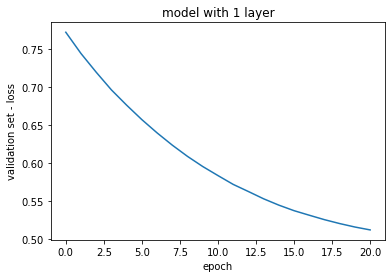

In [12]:
from matplotlib import pyplot as plt

ax = plt.plot(nn_model1.loss_curve_)
plt.xlabel("epoch")
plt.ylabel("validation set - loss")
plt.title("model with 1 layer")

Text(0.5, 1.0, 'model with 2 layers')

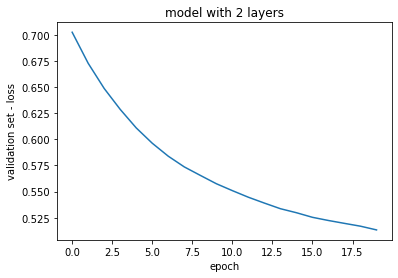

In [13]:
ax = plt.plot(nn_model2.loss_curve_)
plt.xlabel("epoch")
plt.ylabel("validation set - loss")
plt.title("model with 2 layers")

### Classification reports

In [14]:
from sklearn.metrics import classification_report
from sklearn import metrics
print("\n=======================================================================")
print("Prediction results on test set - NN model with 1 hidden layer")
y_pred = nn_model1.predict(X_test_std)
print(classification_report(y_test,y_pred))


Prediction results on test set - NN model with 1 hidden layer
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       108
           1       0.46      0.70      0.55        46

    accuracy                           0.66       154
   macro avg       0.65      0.67      0.64       154
weighted avg       0.72      0.66      0.68       154



In [15]:
from sklearn.metrics import classification_report
from sklearn import metrics
print("\n=======================================================================")
print("Prediction results on test set - NN model with 2 hidden layers")
y_pred = nn_model2.predict(X_test_std)
print(classification_report(y_test,y_pred))


Prediction results on test set - NN model with 2 hidden layers
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       108
           1       0.52      0.65      0.58        46

    accuracy                           0.71       154
   macro avg       0.68      0.70      0.68       154
weighted avg       0.74      0.71      0.72       154



### Extracting weights from the model

In [16]:
print("Model1 with one hidden layer with 10 nodes")
print(len(nn_model1.coefs_))
print("weights between input layer and hidden layer", nn_model1.coefs_[0].shape)
print("weights between hidden layer and output layer",nn_model1.coefs_[1].shape)


print("biases for nn model 1 ")
print(len(nn_model1.intercepts_))
print("biases to hidden layer 1",nn_model1.intercepts_[0].shape)
print("biases to output layer",nn_model1.intercepts_[1].shape)

Model1 with one hidden layer with 10 nodes
2
weights between input layer and hidden layer (8, 10)
weights between hidden layer and output layer (10, 1)
biases for nn model 1 
2
biases to hidden layer 1 (10,)
biases to output layer (1,)


* (8,10): number of nodes in input layer and hidden layer are 8 and 10, respectively.
* (10,1): number of nodes in hidden layer and output layer are 10, and 1, respectively.

In [17]:
print("Model2 with two hidden layers with 10 nodes")
print(len(nn_model2.coefs_))
print("weights between input layer and hidden layer1", nn_model2.coefs_[0].shape)
print("weights between hidden layer1 and hidden layer2",nn_model2.coefs_[1].shape)
print("weights between hidden layer2 and output layer",nn_model2.coefs_[2].shape)


print("biases for nn model 2 ")
print(len(nn_model2.intercepts_))
print("biases to hidden layer 1",nn_model2.intercepts_[0].shape)
print("biases to hidden layer 2",nn_model2.intercepts_[1].shape)
print("biases to output layer",nn_model2.intercepts_[2].shape)

Model2 with two hidden layers with 10 nodes
3
weights between input layer and hidden layer1 (8, 10)
weights between hidden layer1 and hidden layer2 (10, 10)
weights between hidden layer2 and output layer (10, 1)
biases for nn model 2 
3
biases to hidden layer 1 (10,)
biases to hidden layer 2 (10,)
biases to output layer (1,)


* (8,10): number of nodes in input layer and first hidden layer are 8 and 10, respectively.
* (10,10): number of nodes in first hidden layer and second hidden layer are 10, and 10, respectively.
* (10,1): number of nodes in last hidden layer and output layer are 10, and 1, respectively.

### With cross validation, with hyper parameter optimization using `CVGridSearch`


In [20]:
from sklearn.model_selection import GridSearchCV

In [18]:
'''
Parameter space for the model with 1 layer
'''
param_space_1 = {
                          'hidden_layer_sizes': [(10,),(50,),(100,),(120,)],
                          'activation': ['relu'], # activation in the hidden layers
                          'solver' : ['adam'], # optimizer name
                          'alpha' : [0,0.001,0.0001], # L2 regularization parameter
                          'batch_size' : [20,50], # batch size
                          'learning_rate' : ['constant'], 
                          'learning_rate_init' : [0.001,0.005,0.0001], # learning rate
                          'early_stopping' : [True], # how to stop training the model
                          'validation_fraction': [0.1], # how much of training set is used as validation set.
                          'n_iter_no_change' : [10]
}

'''
Parameter space for the model with 2 layers
'''
param_space_2 = {
                          'hidden_layer_sizes': [(10,10),(50,50),(100,100),(120,120)],
                          'activation': ['relu'], # activation in the hidden layers
                          'solver' : ['adam'], # optimizer name
                          'alpha' : [0,0.001,0.0001], # L2 regularization parameter
                          'batch_size' : [20,50], # batch size
                          'learning_rate' : ['constant'], 
                          'learning_rate_init' : [0.001,0.005,0.0001], # learning rate
                          'early_stopping' : [True], # how to stop training the model
                          'validation_fraction': [0.1], # how much of training set is used as validation set.
                          'n_iter_no_change' : [10]
}

#### GridSearchCV for model  with 1 layer

`Hyperparameter optimization`: Here, we are simply using GridSearch that goes through all possible combinations/options in the given parameter space. The Dataset is small enough and it will not take too much time.

In [21]:
from sklearn.neural_network import MLPClassifier
mlp_model1 = MLPClassifier()
model1 = GridSearchCV(mlp_model1 , param_space_1,cv=5)
model1.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu'], 'alpha': [0, 0.001, 0.0001],
                         'batch_size': [20, 50], 'early_stopping': [True],
                         'hidden_layer_sizes': [(10,), (50,), (100,), (120,)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.001, 0.005, 0.0001],
                         'n_iter_no_change': [10], 'solver': ['adam'],
                         'validation_fraction': [0.1]})

In [22]:
print("model with 1 layer best hyperparameters ")
model1.best_params_

model with 1 layer best hyperparameters 


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 20,
 'early_stopping': True,
 'hidden_layer_sizes': (120,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.005,
 'n_iter_no_change': 10,
 'solver': 'adam',
 'validation_fraction': 0.1}

In [23]:
from sklearn.metrics import classification_report
from sklearn import metrics
print("\n=======================================================================")
print("Prediction results on test set - NN model with 1 hidden layer")
y_pred = model1.predict(X_test_std)
print(classification_report(y_test,y_pred))


Prediction results on test set - NN model with 1 hidden layer
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       108
           1       0.58      0.70      0.63        46

    accuracy                           0.76       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.78      0.76      0.77       154



#### GridSearchCV for model  with 2 layers

In [24]:
from sklearn.neural_network import MLPClassifier
mlp_model2 = MLPClassifier()
model2 = GridSearchCV(mlp_model2 , param_space_2,cv=5)
model2.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu'], 'alpha': [0, 0.001, 0.0001],
                         'batch_size': [20, 50], 'early_stopping': [True],
                         'hidden_layer_sizes': [(10, 10), (50, 50), (100, 100),
                                                (120, 120)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.001, 0.005, 0.0001],
                         'n_iter_no_change': [10], 'solver': ['adam'],
                         'validation_fraction': [0.1]})

In [95]:
print("model with 2 layers best hyperparameters ")
model2.best_params_

model with 2 layers best hyperparameters 


{'activation': 'relu',
 'alpha': 0,
 'batch_size': 20,
 'early_stopping': True,
 'hidden_layer_sizes': (120, 120),
 'learning_rate': 'constant',
 'learning_rate_init': 0.005,
 'n_iter_no_change': 10,
 'solver': 'adam',
 'validation_fraction': 0.1}

In [113]:
from sklearn.metrics import classification_report
from sklearn import metrics
print("\n=======================================================================")
print("Prediction results on test set - NN model with 2 hidden layers")
y_pred = model2.predict(X_test_std)
print(classification_report(y_test,y_pred))


Prediction results on test set - NN model with 2 hidden layers
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       103
           1       0.49      0.67      0.57        51

    accuracy                           0.66       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.70      0.66      0.67       154



#### In summary, The predictions on the test set has been improved by trying out different options of the parameters in the model.

### To get the parameter values from the best model after CV grid search

In [124]:
print("Model2 with two hidden layers after CV grid search")
print(len(model2.best_estimator_.coefs_))
print("weights between input layer and hidden layer1", model2.best_estimator_.coefs_[0].shape)
print("weights between hidden layer1 and hidden layer2",model2.best_estimator_.coefs_[1].shape)
print("weights between hidden layer2 and output layer",model2.best_estimator_.coefs_[2].shape)

Model2 with two hidden layers after CV grid search
3
weights between input layer and hidden layer1 (8, 120)
weights between hidden layer1 and hidden layer2 (120, 120)
weights between hidden layer2 and output layer (120, 1)


# Neural Network models for more than 2 classes


Wine data: original source is https://archive.ics.uci.edu/ml/machine-learning-databases/wine/

Class label is the first column. Three classes : 1, 2, 3

In [136]:
df_wine = pd.read_csv('wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
display(df_wine)
df_wine['Class label'].value_counts()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


2    71
1    59
3    48
Name: Class label, dtype: int64

In [140]:
df_wine['Class label']

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class label, Length: 178, dtype: int64

In [143]:
df_wine_features = df_wine.loc[:,'Alcohol':'Proline'].copy(deep=True) # features. 
df_wine_class = df_wine['Class label'].copy(deep=True) # class labels

In [156]:
from sklearn.model_selection import train_test_split
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(df_wine_features,df_wine_class,test_size=0.2)
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_wine_train_std = stdsc.fit_transform(X_wine_train)
X_wine_test_std = stdsc.transform(X_wine_test)
print(X_wine_train_std.shape)
print(X_wine_test_std.shape)

(142, 13)
(36, 13)


In [157]:
from sklearn.neural_network import MLPClassifier
NN_model1 = MLPClassifier(hidden_layer_sizes=(10,),
                          activation='relu', # activation in the hidden layers
                          solver = 'adam', # optimizer name
                          alpha = 0, # L2 regularization parameter
                          batch_size = 50, # batch size
                          learning_rate = 'constant', 
                          learning_rate_init = 0.001, # learning rate
                          early_stopping=True, # how to stop training the model
                          validation_fraction=0.1, # how much of training set is used as validation set.
                          n_iter_no_change = 10)

In [158]:
NN_model1.fit(X_wine_train_std, y_wine_train)

MLPClassifier(alpha=0, batch_size=50, early_stopping=True,
              hidden_layer_sizes=(10,))

In [159]:
from sklearn.metrics import classification_report
from sklearn import metrics
print("\n=======================================================================")
print("Prediction results on test set - NN model with 2 hidden layers")
y_pred = NN_model1.predict(X_wine_test_std)
print(classification_report(y_wine_test,y_pred))


Prediction results on test set - NN model with 2 hidden layers
              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.89      0.94      0.91        17
           3       0.88      1.00      0.93         7

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



In [160]:
NN_model1.predict_proba(X_wine_test_std)

array([[0.10587462, 0.89180723, 0.00231815],
       [0.73971516, 0.20500143, 0.05528341],
       [0.79523225, 0.08118753, 0.12358022],
       [0.19556466, 0.66749149, 0.13694385],
       [0.06389634, 0.8169513 , 0.11915236],
       [0.06153491, 0.900607  , 0.03785809],
       [0.62702198, 0.21493734, 0.15804068],
       [0.86104888, 0.11889237, 0.02005876],
       [0.39372943, 0.18664245, 0.41962813],
       [0.05944404, 0.8938018 , 0.04675416],
       [0.60834378, 0.33167733, 0.05997888],
       [0.10177086, 0.18479168, 0.71343747],
       [0.10820976, 0.59740851, 0.29438173],
       [0.24624842, 0.20929362, 0.54445795],
       [0.1274289 , 0.82077583, 0.05179527],
       [0.68201425, 0.13919168, 0.17879407],
       [0.13311892, 0.27695684, 0.58992423],
       [0.09670755, 0.89504275, 0.0082497 ],
       [0.09661155, 0.79765288, 0.10573558],
       [0.59587386, 0.37798091, 0.02614522],
       [0.40535759, 0.55339777, 0.04124464],
       [0.10929957, 0.85108257, 0.03961786],
       [0.

In [162]:
y_pred

array([2, 1, 1, 2, 2, 2, 1, 1, 3, 2, 1, 3, 2, 3, 2, 1, 3, 2, 2, 1, 2, 2,
       2, 2, 3, 2, 2, 2, 1, 1, 2, 3, 2, 3, 3, 1], dtype=int64)

In [166]:
print("Model2 with two hidden layers after CV grid search")
print(len(NN_model1.coefs_))
print("weights between input layer and hidden layer1", NN_model1.coefs_[0].shape)
print("weights between hidden layer1 and output layer",NN_model1.coefs_[1].shape)


Model2 with two hidden layers after CV grid search
2
weights between input layer and hidden layer1 (13, 10)
weights between hidden layer1 and output layer (10, 3)
